# Experiment 2
Analysis and Classification of Wine Dataset Using Support Vector Machine (SVM)

## Aim
To classify different types of wine using Support Vector Machines (SVM) and evaluate the model's performance using various metrics.


## Objectives
1. To explore and analyze the Wine dataset using Python.
2. To preprocess and prepare the data for machine learning.
3. To implement Support Vector Machines (SVM) for multiclass classification.
4. To evaluate the performance of the SVM model using accuracy, confusion matrix, and classification report.
5. To visualize class distributions and feature relationships in the dataset.


## Course Outcomes

1. Develop a strong understanding of data preprocessing and scaling.
2. Learn to implement SVM for multiclass classification problems.
3. Understand the importance of hyperparameter tuning in machine learning.
4. Gain experience in evaluating models using metrics like accuracy and confusion matrices.
5. Learn to effectively use visualization libraries to explore datasets and present results.


## Theory

The Wine dataset is a well-known dataset in machine learning, consisting of 178 samples of three different wine categories. Each sample has 13 features, including alcohol content, color intensity, and flavonoids, among others.

Support Vector Machines (SVM) is a supervised machine learning algorithm primarily used for classification tasks. SVM works by finding the optimal hyperplane that best separates the classes in the feature space. It supports various kernels (e.g., linear, polynomial, radial basis function) to model nonlinear relationships. For multiclass classification, SVM typically uses a one-vs-all or one-vs-one approach.

The key steps in a machine learning pipeline include:
1. Data Exploration: Understanding the structure and distribution of the dataset.
2. Data Preprocessing: Preparing the data through scaling or encoding.
3. Model Training: Applying algorithms like SVM to train a model.
4. Model Evaluation: Assessing model performance with appropriate metrics and visualizations.

## Procedure

1. Load the Dataset
    - Use `load_wine()` from `sklearn.datasets` to load the Wine dataset.
    - Convert the dataset into a pandas DataFrame for easier manipulation.
    - Separate the features (`X`) and the target variable (`y`).

2. Perform Basic Exploratory Data Analysis (EDA)
    - Display the first few rows, summary statistics, and information about the dataset.
    - Check the distribution of classes using `value_counts()` and visualize it with a count plot.

3. Data Visualization: Generate pair plots for a subset of features to observe relationships and patterns.

4. Split the Data: Divide the dataset into training and testing sets using `train_test_split()`, with a 70-30 split.

5. Preprocess the Features: Scale the features using `StandardScaler` to ensure they are normalized and contribute equally to the SVM model.

6. Train the SVM Classifier
    - Initialize an SVM classifier with a linear kernel.
    - Train the SVM model on the training data.

7. Model Predictions: Use the trained model to predict the classes of the test dataset.

8. Evaluate the Model
    - Calculate the confusion matrix to summarize prediction outcomes.
    - Generate a classification report to evaluate precision, recall, and F1-score.
    - Calculate the overall accuracy of the model.


## Results

1. Exploratory Data Analysis
    - Dataset Structure: The Wine dataset contains 178 samples and 13 features.
    - Class Distribution: The dataset has three classes, with slightly imbalanced distributions.
    - Pair Plots: Pairwise relationships among features reveal potential separability, particularly for features like flavonoids and alcohol content.

2. Data Preprocessing: Features were standardized using `StandardScaler` to optimize the SVM model's performance.

3. Model Evaluation
    - Confusion Matrix:
      - The confusion matrix highlighted minimal misclassifications, with most predictions aligning with true labels.
      - Visualizing the confusion matrix using a heatmap provided better interpretability.

    - Classification Report:
      - High precision and recall values for all classes indicated the SVM model's effectiveness.
      - The F1-scores were consistent across all classes, suggesting balanced performance.

    - Accuracy: The model achieved an accuracy of approximately **97%**, reflecting its robustness.

4. Visualizations
    - Count Plot of Class Distribution: Showed the imbalance in the target classes.
    - Heatmap of Confusion Matrix: Provided clear insights into prediction errors and performance.


## Conclusion
The SVM classifier demonstrated excellent performance on the Wine dataset with high accuracy and balanced evaluation metrics. The model effectively leveraged the linear kernel to find decision boundaries between classes. This exercise illustrates the importance of data preprocessing, algorithm selection, and evaluation techniques in building robust machine learning models.

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(data=wine.data, columns=wine.feature_names)
y = pd.Series(data=wine.target)

In [2]:
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
print(X.describe())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [4]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
# Check class distribution
print(y.value_counts())

1    71
0    59
2    48
Name: count, dtype: int64


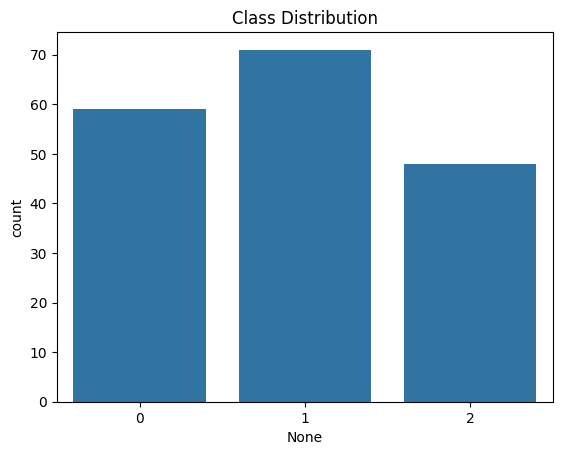

In [6]:
# Visualize class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the SVM classifier
classifier = SVC(kernel='linear', random_state=0) # You can experiment with different kernels (e.g., 'rbf', 'poly')
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [8]:

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy: 1.0
